# <span style="color:red">Segmenting and Clustering Neighborhoods in Toronto </span>

All codes are taken from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M 

###  1.  Now I am going to install all useful package and libraries

In [1]:
conda install -c anaconda beautifulsoup

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - beautifulsoup

Current channels:

  - https://conda.anaconda.org/anaconda/linux-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/linux-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/linux-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install BeautifulSoup4

     |████████████████████████████████| 112kB 8.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lxml

     |████████████████████████████████| 5.8MB 4.9MB/s eta 0:00:01/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

### 2. Now we are ready to import Toronto codes

In [6]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text

In [7]:
soup = BeautifulSoup(source, 'xml')

In [8]:
table=soup.find('table')

In [9]:
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

In [10]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

### 3. To create the above dataframe 

 ####            -  Now we can see a DataFrame with 3 columns: PostalCode, Borough, and Neighborhood 

In [11]:
df.head()

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [12]:
df.tail()

,Postalcode,Borough,Neighborhood
175,M5Z,Not assigned,
176,M6Z,Not assigned,
177,M7Z,Not assigned,
178,M8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...
179,M9Z,Not assigned,


###  - Ignore cells with a borough that is Not assigned.


In [13]:
df=df[df['Borough']!='Not assigned'] 

In [14]:
df.head()

,Postalcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [15]:
df.tail()

,Postalcode,Borough,Neighborhood
160,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing CentrE
169,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...
178,M8Z,Etobicoke,Mimico NW / The Queensway West / South of Bloo...


### - Join Neighborhoods with the same PostalCode 

In [16]:
df2=df.groupby('Postalcode')['Neighborhood'].apply(lambda x: "%s" % ','.join(x))
df2=df2.reset_index(drop=False)
df2.rename(columns={'Neighborhood':'Neighborhood_joined'},inplace=True)

In [17]:
df_final = pd.merge(df, df2, on='Postalcode')

In [18]:
df_final.drop(['Neighborhood'],axis=1,inplace=True)

In [19]:
df_final.drop_duplicates(inplace=True)

In [20]:
df_final.rename(columns={'Neighborhood_joined':'Neighborhood'},inplace=True)

In [21]:
df_final

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,The Kingsway / Montgomery Road / Old Mill North
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing CentrE
101,M8Y,Etobicoke,Old Mill South / King's Mill Park / Sunnylea /...


In [22]:
df_final.head(12)

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,Malvern / Rouge
7,M3B,North York,Don Mills
8,M4B,East York,Parkview Hill / Woodbine Gardens
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe

In [23]:
df_final.shape

(103, 3)

## <span style="color:red">Tasks 1-4 are finished  .</span> 



### Let's continue ..... 

###  - to Import csv file to create the Dataframe with Lattitude and Longitude

In [24]:
df_GC = pd.read_csv('Geospatial_Coordinates.csv')
df_GC.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [25]:
print('The coordinates dataframe shape is', df_GC.shape)

The coordinates dataframe shape is (103, 3)


###  - Now we can join 2 tables and to create the following dataframe:

In [ ]:
df_GC.rename(columns={'Postal Code':'Postalcode'},inplace=True)
geo_merged = pd.merge(df_final,df_GC,on='Postalcode')

In [ ]:
geo_merged.head(12)

### - to provide a map of Toronto with positions of Post codes 

In [29]:
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [30]:
map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in geo_merged.itertuples(): #iterate each row of the dataframe
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-2], location[-1]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=500,
        popup=label,
        location=[location[-2], location[-1]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

### -to see how they are distributed along the plane in the Latitude and Longitude coordinates

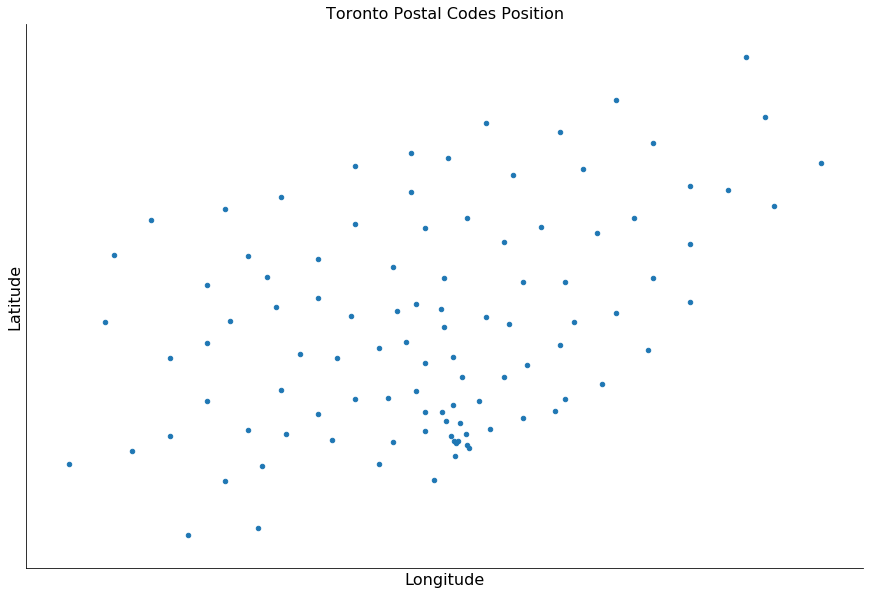

In [31]:
import matplotlib.pyplot as plt

X = geo_merged[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

###  - To define the radius, it's necessary to find the closest points for each postcode.

In [32]:
pip install geopy

     |████████████████████████████████| 112kB 22.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
from geopy.distance import great_circle

#function to get the closest postcode pair and the distance using latitude and longitude
def closest_postcode(postcode, postcodes):
    postcode = np.asarray(postcode).reshape(1,-1)
    postcodes = np.asarray(postcodes)
    distances = [great_circle(postcode, point).meters for point in postcodes]
    closest_postcode_index = np.argmin(distances)
    return [round(distances[closest_postcode_index]), closest_postcode_index]

In [34]:
coordinates = geo_merged[['Latitude', 'Longitude']]

distance, closest_point_index = closest_postcode(coordinates[:1], coordinates[~coordinates.index.isin([0])])
close_points = X[:1].append(X[closest_point_index+1:closest_point_index+2])
close_points

,Longitude,Latitude
0,-79.329656,43.753259
7,-79.352188,43.745906


### -  Now Column "Distance " will be added to the DataFrame and will used as the radius cover for each postcode

In [35]:
from math import isnan

for lat, lng, idx in zip(geo_merged['Latitude'], geo_merged['Longitude'], geo_merged.index):
    distance, closest_point_index = closest_postcode([lat,lng], coordinates[~coordinates.index.isin([idx])])
    geo_merged.at[idx,'Distance'] = np.int64(distance//2) #use the half of the disstance to avoid overlapping
    
geo_merged.head(15)

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Distance
0,M3A,North York,Parkwoods,43.753259,-79.329656,993.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,1018.0
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,614.0
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,934.0
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494,256.0
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,1288.0
6,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353,1698.0
7,M3B,North York,Don Mills,43.745906,-79.352188,993.0
8,M4B,East York,Parkview Hill / Woodbine Gardens,43.706397,-79.309937,702.0
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,342.0


### - Let's have a look at the map , where we can see all post codes with their radius 

In [36]:
map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in geo_merged.itertuples(): #iterate each row of the dataframe
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-3], location[-2]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=location[-1],
        popup=label,
        location=[location[-3], location[-2]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map
#The map is plotted using different radius for each postal code. Now not only overlapping was avoided but more area of the city is cover, consequently, more venues are retrieved

###  - Let's investigate Venues more in details . Our purpose is to add venues to Data Frame

In [37]:
CLIENT_ID = '0RJKNKVNGQ4TBXPY0DQN4MRJIXZO1YS3W2MSOLGESJT34MBD' # your Foursquare ID
CLIENT_SECRET = 'ZFY50IOKW3W5PBLSL41OW10HTKG3K2HVX1XWIRJTHPRLVFK1' # your Foursquare Secret
VERSION = '20181102'

In [38]:
#function to format url
def format_url(lat, lng, radius=500, limit=100):
    return 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 
        lat, lng, VERSION, radius, limit)

In [39]:
from math import isnan

for lat, lng, idx in zip(geo_merged['Latitude'], geo_merged['Longitude'], geo_merged.index):
    distance, closest_point_index = closest_postcode([lat,lng], coordinates[~coordinates.index.isin([idx])])
    geo_merged.at[idx,'Distance'] = np.int64(distance//2) #use the half of the disstance to avoid overlapping
    
    geo_merged.head(15) 

In [40]:
first_postcode =  geo_merged.iloc[2, :]
url = format_url(first_postcode['Latitude'], first_postcode['Longitude'], first_postcode['Distance'])

url

'https://api.foursquare.com/v2/venues/explore?client_id=0RJKNKVNGQ4TBXPY0DQN4MRJIXZO1YS3W2MSOLGESJT34MBD&client_secret=ZFY50IOKW3W5PBLSL41OW10HTKG3K2HVX1XWIRJTHPRLVFK1&ll=43.6542599,-79.3606359&v=20181102&radius=614.0&limit=100'

In [41]:

#function to get batch of venues as a dataframe
def get_venues(url):
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    return json_normalize(venues)

In [42]:

venues_df = get_venues(url)

venues_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-54ea41ad498e9a11e9e13308-0,0,"[{'summary': 'This spot is popular', 'type': '...",54ea41ad498e9a11e9e13308,Roselle Desserts,362 King St E,Trinity St,43.653447,-79.362017,"[{'label': 'display', 'lat': 43.65344672305267...",143,M5A 1K9,CA,Toronto,ON,Canada,"[362 King St E (Trinity St), Toronto ON M5A 1K...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
1,e-0-53b8466a498e83df908c3f21-1,0,"[{'summary': 'This spot is popular', 'type': '...",53b8466a498e83df908c3f21,Tandem Coffee,368 King St E,at Trinity St,43.653559,-79.361809,"[{'label': 'display', 'lat': 43.65355870959944...",122,NaN,CA,Toronto,ON,Canada,"[368 King St E (at Trinity St), Toronto ON, Ca...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN
2,e-0-574c229e498ebb5c6b257902-2,0,"[{'summary': 'This spot is popular', 'type': '...",574c229e498ebb5c6b257902,Cooper Koo Family YMCA,461 Cherry St,NaN,43.653249,-79.358008,"[{'label': 'display', 'lat': 43.65324910177244...",239,M5A 0H7,CA,Toronto,ON,Canada,"[461 Cherry St, Toronto ON M5A 0H7, Canada]","[{'id': '52e81612bcbc57f1066b7a37', 'name': 'D...",0,[],NaN,NaN
3,e-0-50760559e4b0e8c7babe2497-3,0,"[{'summary': 'This spot is popular', 'type': '...",50760559e4b0e8c7babe2497,Body Blitz Spa East,497 King Street East,btwn Sackville St and Sumach St,43.654735,-79.359874,"[{'label': 'display', 'lat': 43.65473505045365...",80,M5A 1L9,CA,Toronto,ON,Canada,[497 King Street East (btwn Sackville St and S...,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",0,[],NaN,NaN
4,e-0-5612b1cc498e3dd742af0dc8-4,0,"[{'summary': 'This spot is popular', 'type': '...",5612b1cc498e3dd742af0dc8,Impact Kitchen,573 King St E,at St Lawrence St,43.656369,-79.356980,"[{'label': 'display', 'lat': 43.65636850543279...",376,M5A 4L3,CA,Toronto,ON,Canada,"[573 King St E (at St Lawrence St), Toronto ON...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN


In [43]:
#function to clean the venues dataframe
def clean_df(df):
    relevant_columns = ['venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.name']
    clean_df = df.loc[:,relevant_columns]

    #rename columns
    clean_df.columns = ['Category', 'Lat', 'Lng', 'Name']
    return clean_df 

venues_df = clean_df(venues_df)
venues_df.head()

,Category,Lat,Lng,Name
0,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",43.653447,-79.362017,Roselle Desserts
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.653559,-79.361809,Tandem Coffee
2,"[{'id': '52e81612bcbc57f1066b7a37', 'name': 'D...",43.653249,-79.358008,Cooper Koo Family YMCA
3,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",43.654735,-79.359874,Body Blitz Spa East
4,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",43.656369,-79.356980,Impact Kitchen


In [44]:
venues_df.loc[0, 'Category']

[{'id': '4bf58dd8d48988d16a941735',
  'name': 'Bakery',
  'pluralName': 'Bakeries',
  'shortName': 'Bakery',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
   'suffix': '.png'},
  'primary': True}]

In [45]:

#function that extract the category name
def get_category_name(row):
    category_json = row['Category']
    try:
        return category_json[0]['name']
    except:        
        return None

venues_df['Category'] = venues_df.apply(get_category_name, axis=1)

venues_df

,Category,Lat,Lng,Name
0,Bakery,43.653447,-79.362017,Roselle Desserts
1,Coffee Shop,43.653559,-79.361809,Tandem Coffee
2,Distribution Center,43.653249,-79.358008,Cooper Koo Family YMCA
3,Spa,43.654735,-79.359874,Body Blitz Spa East
4,Restaurant,43.656369,-79.356980,Impact Kitchen
5,Breakfast Spot,43.653947,-79.361149,Morning Glory Cafe
6,Park,43.655618,-79.356211,Corktown Common
7,Historic Site,43.650244,-79.359323,The Distillery Historic District
8,Breakfast Spot,43.655675,-79.364503,Figs Breakfast & Lunch
9,Farmers Market,43.650075,-79.361832,Distillery Sunday Market


In [46]:

#function to construct the dataframe with all the venues (max 100 venues per postal code)
def get_all_venues(postcodes, lat, lng, radius):
    venues_list=[]
    for postcode, lat, lng, radius in zip(postcodes, lat, lng, radius):
        url= format_url(lat, lng, radius)
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(
            postcode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name'])
            for v in results])
    all_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    all_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category'
                  ]
    
    return all_venues

In [47]:
all_venues = get_all_venues(geo_merged['Postalcode'], geo_merged['Latitude'], geo_merged['Longitude'], geo_merged['Distance'])

print('The total number of venues returned is ', all_venues.shape[0])

all_venues.head(10)



The total number of venues returned is  3372


,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,M3A,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,M3A,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
3,M3A,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant
4,M3A,43.753259,-79.329656,Bruno's valu-mart,43.746143,-79.324630,Grocery Store
5,M3A,43.753259,-79.329656,High Street Fish & Chips,43.745260,-79.324949,Fish & Chips Shop
6,M3A,43.753259,-79.329656,Food Basics,43.760549,-79.326045,Supermarket
7,M3A,43.753259,-79.329656,Shoppers Drug Mart,43.745315,-79.325800,Pharmacy
8,M3A,43.753259,-79.329656,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
9,M3A,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop


In [48]:
print('Total Toronto postcodes:', geo_merged['Postalcode'].shape[0])
print('Total Toronto postcodes with venues:', all_venues['Postcode'].unique().shape[0])

Total Toronto postcodes: 103
Total Toronto postcodes with venues: 102


In [49]:
postcodes_diff = np.setdiff1d(geo_merged['Postalcode'].values,all_venues['Postcode'].unique())
geo_merged[geo_merged['Postalcode']==postcodes_diff[0]]

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Distance
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,111.0


# to Analyze venues data

#### - we can group them according post codes 

In [66]:

venues_in_postcode = all_venues.groupby('Postcode').count()
venues_in_postcode = pd.DataFrame(list(zip(venues_in_postcode.index, venues_in_postcode['Venue'])), 
                                  columns=['Postalcode', '# of Venues']).set_index('Postalcode').join(geo_merged[['Postalcode','Distance']].set_index('Postalcode'), on='Postalcode').reset_index()
venues_in_postcode['Distance'] = np.int64(venues_in_postcode['Distance'])
venues_in_postcode.loc[len(venues_in_postcode.index)] = ['M5E', 0, 111] #add M5E (postcode without venues) with zero as # of venues

venues_in_postcode.head(10)

,Postalcode,# of Venues,Distance
0,M1B,38,1698
1,M1C,8,1625
2,M1E,29,1205
3,M1G,5,913
4,M1H,21,913
5,M1J,25,1301
6,M1K,26,1112
7,M1L,33,1052
8,M1M,18,1112
9,M1N,16,1297


#### - As we know each postcode has a different radius . In this case it's more correct to add Distance and calculate Density of each post code 

In [68]:
density_venues_in_postcode = all_venues.groupby('Postcode').count()

density_venues_in_postcode = pd.DataFrame(list(zip(density_venues_in_postcode.index, density_venues_in_postcode['Venue'])), 
                                  columns=['Postcode', 'Density']).set_index('Postcode').join(geo_merged[['Postalcode','Distance']].set_index('Postalcode'), on='Postcode').reset_index()
density_venues_in_postcode['Density'] = np.int64(density_venues_in_postcode['Density']/(density_venues_in_postcode['Distance']/1000)) #distance in km
density_venues_in_postcode.loc[len(venues_in_postcode.index)] = ['M5E', 0, 111] #add M5E (postcode without venues) with zero as density

density_venues_in_postcode.head(10)

,Postcode,Density,Distance
0,M1B,22,1698.0
1,M1C,4,1625.0
2,M1E,24,1205.0
3,M1G,5,913.0
4,M1H,23,913.0
5,M1J,19,1301.0
6,M1K,23,1112.0
7,M1L,31,1052.0
8,M1M,16,1112.0
9,M1N,12,1297.0


In [58]:
density_venues_in_postcode[['Density']].describe()

,Density
count,103.000000
mean,46.242718
std,47.272773
min,0.000000
25%,16.000000
50%,30.000000
75%,60.000000
max,277.000000


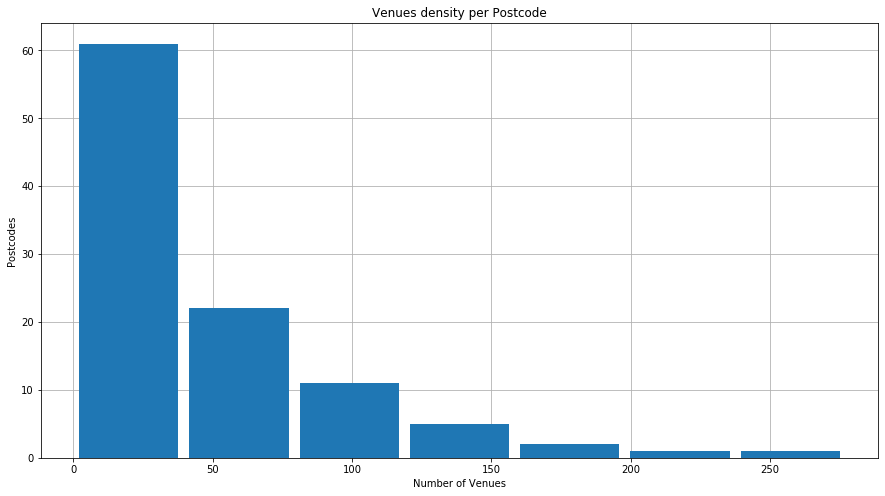

In [59]:
density_venues_in_postcode['Density'].hist(bins=7, figsize=(15,8),zorder=2, rwidth=0.9)

plt.xlabel('Number of Venues')
plt.ylabel('Postcodes')
plt.title('Venues density per Postcode')
plt.show()


#### The histogram shows that Toronto has a low population density.The First bar has > 60% of post codes. The last three bars on the plot have very low values, it could be possible to merge that data and use 5 venues density ranges for the clustering

### -Let's calculate Clusters

#### Next the postcodes are clustered based on venues density , according previous investigation it can be five or four. The elbow method is used to have a better sense of the optimal number. 

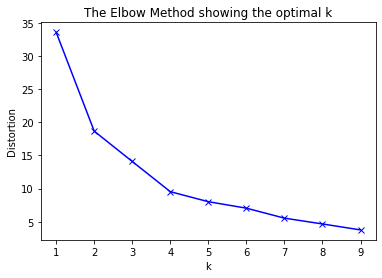

In [78]:
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(density_venues_in_postcode['Density'].values.reshape(-1, 1))
    distortions.append(sum(np.min(cdist(density_venues_in_postcode['Density'].values.reshape(-1, 1),
                                        k_means.cluster_centers_, 'euclidean'), axis=1)) / density_venues_in_postcode['Density'].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [73]:

num_clusters = 5

k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 12)
k_means.fit(density_venues_in_postcode['Density'].values.reshape(-1, 1))
labels = k_means.labels_

print(labels)

[1 1 1 1 1 1 1 3 1 1 3 3 3 3 3 3 1 1 3 1 1 3 0 3 1 3 3 3 3 3 1 1 1 1 1 1 1
 0 0 3 3 4 3 4 1 1 3 0 1 0 1 0 2 0 2 0 0 4 2 0 4 3 1 1 3 0 4 3 0 0 3 3 1 1
 3 3 4 0 1 1 3 0 0 0 1 3 3 3 3 3 1 3 1 1 1 1 1 1 1 1 1 1 1]


In [74]:
density_venues_in_postcode['Cluster'] = k_means.labels_
density_venues_in_postcode.head(10)

,Postcode,Density,Distance,Cluster
0,M1B,22,1698.0,1
1,M1C,4,1625.0,1
2,M1E,24,1205.0,1
3,M1G,5,913.0,1
4,M1H,23,913.0,1
5,M1J,19,1301.0,1
6,M1K,23,1112.0,1
7,M1L,31,1052.0,3
8,M1M,16,1112.0,1
9,M1N,12,1297.0,1


### Examine clusters . Let's group by clusters

In [75]:
centroids = np.int64(round(density_venues_in_postcode.groupby('Cluster').mean()['Density']))
frecuency = density_venues_in_postcode.groupby('Cluster').count()['Postcode']

cluster_info = pd.DataFrame([np.arange(0,5), centroids, frecuency], index=['Cluster', 'Centroid','Postcodes']).T
cluster_info.sort_values('Centroid', inplace=True)
cluster_info.reset_index(drop=True, inplace=True)

cluster_info

,Cluster,Centroid,Postcodes
0,1,13,44
1,3,39,33
2,0,84,17
3,4,134,6
4,2,225,3



#### Based on the centroids of each cluster, the cluster names can be defined as:

#### 'Low Venues Density': Centroid < 13 
#### 'Medium-Low Venues Density' with a centroid < 39
#### 'Medium-High Venues Density' with a centroid < 84
#### 'High Venues Density' with a centroid < 134
#### 'Very High Venues Density' with a centroid < 225

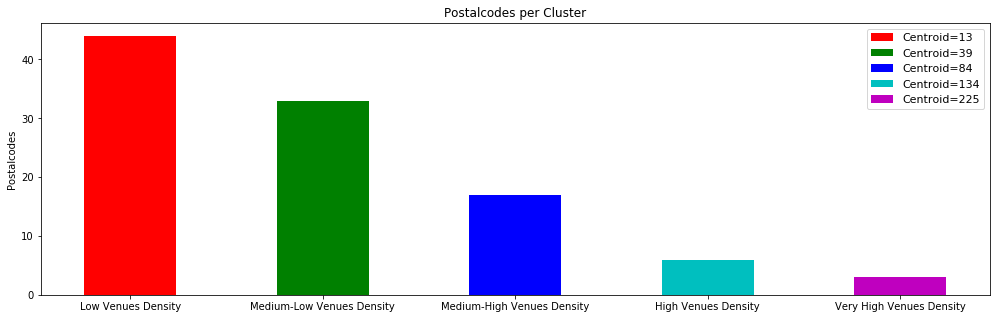

In [76]:
fig, ax = plt.subplots(figsize=(17,5))
clusters= ['Low Venues Density','Medium-Low Venues Density','Medium-High Venues Density','High Venues Density','Very High Venues Density']
colors = ['r','g','b','c','m']
legend = []

for id, cluster in enumerate(clusters):
    legend.append('Centroid={}'.format(cluster_info['Centroid'][id]))
    bar = ax.bar(cluster, cluster_info['Postcodes'][id], 0.48, color=colors[id])

ax.set_ylabel('Postalcodes')
ax.set_title('Postalcodes per Cluster')
# ax.set_facecolor((1,1,1))
# ax.grid(True, axis='y',color='k', linestyle='-', linewidth=1)

plt.legend(legend, fontsize=11)

plt.show()

## <span style="color:red">Now we can generate maps to visualize your neighborhoods and how they cluster together.</span>

In [77]:

postcodes_with_coordinates_df = pd.concat([geo_merged[:56],geo_merged[57:],geo_merged[56:57]]) #move M5E to the last row
postcodes_with_coordinates_df['Cluster'] = k_means.labels_

colors = ['red','green','blue','cyan','magenta']
clusters_values = cluster_info['Cluster']

map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in postcodes_with_coordinates_df.itertuples(): #iterate each row of the dataframe
    cluster_index = clusters_values.index[clusters_values==location[-1]][0]
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}; {}'.format(location[1], location[2], location[3], clusters[cluster_index])
    label = folium.Popup(label, parse_html=True)    
    folium.Circle(
        radius=location[-2],
        popup=label,
        location=[location[-4], location[-3]],
        color=None,
        fill=True,
        fill_opacity=0.4,
        fill_color=colors[cluster_index]
    ).add_to(map) 

map

## The results shown on the map can be useful in solving issues related to social life, sale of real estate. Venues density could be related with quarantine during the pandemic, noise, pollution, crime.
